# Problem Definition

We are trying to predict whether the student might have depresion or not based on the various data he/she
provided like CGPA, Age, Job Satisfaction and all that .

# Importing Libraries

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


### Loading the dataset 

In [160]:
data = pd.read_csv('./data/Selected_1000_Students.csv')

In [161]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,123970,Male,31.0,Kolkata,Student,5.0,0.0,5.60,1.0,0.0,Less than 5 hours,Unhealthy,MBBS,Yes,2.0,1.0,Yes,1
1,92369,Female,21.0,Surat,Student,5.0,0.0,9.41,3.0,0.0,More than 8 hours,Healthy,BA,Yes,8.0,4.0,Yes,1
2,29485,Female,26.0,Rajkot,Student,1.0,0.0,5.26,4.0,0.0,More than 8 hours,Healthy,BSc,Yes,2.0,5.0,No,1
3,49899,Male,28.0,Indore,Student,4.0,0.0,9.66,3.0,0.0,5-6 hours,Healthy,M.Pharm,Yes,3.0,4.0,Yes,1
4,94637,Male,21.0,Bhopal,Student,4.0,0.0,9.21,1.0,0.0,Less than 5 hours,Moderate,PhD,Yes,11.0,4.0,No,1


## Data Analysis

Basic Infos and Data Types`

In [162]:
print('Basic Dataset Information')

Basic Dataset Information


In [163]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     1000 non-null   int64  
 1   Gender                                 1000 non-null   object 
 2   Age                                    1000 non-null   float64
 3   City                                   1000 non-null   object 
 4   Profession                             1000 non-null   object 
 5   Academic Pressure                      1000 non-null   float64
 6   Work Pressure                          1000 non-null   float64
 7   CGPA                                   1000 non-null   float64
 8   Study Satisfaction                     1000 non-null   float64
 9   Job Satisfaction                       1000 non-null   float64
 10  Sleep Duration                         1000 non-null   object 
 11  Dieta

In [164]:
print("Summary statistics")

Summary statistics


In [165]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,1000.000000,1000.000000,1000.000000,1000.0,1000.00000,1000.000000,1000.0,1000.000000,1000.00000,1000.00000
mean,68771.262000,25.881000,3.036000,0.0,7.67487,2.985000,0.0,7.144000,3.06300,0.50000
std,40492.255917,5.051173,1.411629,0.0,1.46390,1.348552,0.0,3.767155,1.42796,0.50025
min,62.000000,18.000000,1.000000,0.0,5.03000,1.000000,0.0,0.000000,1.00000,0.00000
25%,34855.750000,22.000000,2.000000,0.0,6.36000,2.000000,0.0,4.000000,2.00000,0.00000
50%,67382.000000,26.000000,3.000000,0.0,7.77000,3.000000,0.0,8.000000,3.00000,0.50000
75%,103510.750000,30.000000,4.000000,0.0,8.95000,4.000000,0.0,10.000000,4.00000,1.00000
max,140503.000000,59.000000,5.000000,0.0,10.00000,5.000000,0.0,12.000000,5.00000,1.00000


In [166]:
data.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

## Missing Value analysis

In [167]:
print(data.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [168]:
## It means there is no missing data in the given dataset

In [169]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,123970,Male,31.0,Kolkata,Student,5.0,0.0,5.60,1.0,0.0,Less than 5 hours,Unhealthy,MBBS,Yes,2.0,1.0,Yes,1
1,92369,Female,21.0,Surat,Student,5.0,0.0,9.41,3.0,0.0,More than 8 hours,Healthy,BA,Yes,8.0,4.0,Yes,1
2,29485,Female,26.0,Rajkot,Student,1.0,0.0,5.26,4.0,0.0,More than 8 hours,Healthy,BSc,Yes,2.0,5.0,No,1
3,49899,Male,28.0,Indore,Student,4.0,0.0,9.66,3.0,0.0,5-6 hours,Healthy,M.Pharm,Yes,3.0,4.0,Yes,1
4,94637,Male,21.0,Bhopal,Student,4.0,0.0,9.21,1.0,0.0,Less than 5 hours,Moderate,PhD,Yes,11.0,4.0,No,1


## Data Preprocessing

Handling Missing values

In [170]:
data.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

## Encoding Categorical Values

### Binary Encoding

In [171]:
binary_columns = ['Have you ever had suicidal thoughts ?','Family History of Mental Illness']

for col in binary_columns:
    data[col] = data[col].map({'Yes':1,'No':0})
data .head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,123970,Male,31.0,Kolkata,Student,5.0,0.0,5.60,1.0,0.0,Less than 5 hours,Unhealthy,MBBS,1,2.0,1.0,1,1
1,92369,Female,21.0,Surat,Student,5.0,0.0,9.41,3.0,0.0,More than 8 hours,Healthy,BA,1,8.0,4.0,1,1
2,29485,Female,26.0,Rajkot,Student,1.0,0.0,5.26,4.0,0.0,More than 8 hours,Healthy,BSc,1,2.0,5.0,0,1
3,49899,Male,28.0,Indore,Student,4.0,0.0,9.66,3.0,0.0,5-6 hours,Healthy,M.Pharm,1,3.0,4.0,1,1
4,94637,Male,21.0,Bhopal,Student,4.0,0.0,9.21,1.0,0.0,Less than 5 hours,Moderate,PhD,1,11.0,4.0,0,1


In [172]:
data.head(10)


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,123970,Male,31.0,Kolkata,Student,5.0,0.0,5.60,1.0,0.0,Less than 5 hours,Unhealthy,MBBS,1,2.0,1.0,1,1
1,92369,Female,21.0,Surat,Student,5.0,0.0,9.41,3.0,0.0,More than 8 hours,Healthy,BA,1,8.0,4.0,1,1
2,29485,Female,26.0,Rajkot,Student,1.0,0.0,5.26,4.0,0.0,More than 8 hours,Healthy,BSc,1,2.0,5.0,0,1
3,49899,Male,28.0,Indore,Student,4.0,0.0,9.66,3.0,0.0,5-6 hours,Healthy,M.Pharm,1,3.0,4.0,1,1
4,94637,Male,21.0,Bhopal,Student,4.0,0.0,9.21,1.0,0.0,Less than 5 hours,Moderate,PhD,1,11.0,4.0,0,1
5,107986,Male,25.0,Pune,Student,3.0,0.0,5.74,1.0,0.0,5-6 hours,Moderate,M.Com,1,8.0,3.0,1,1
6,84754,Male,18.0,Srinagar,Student,3.0,0.0,5.42,5.0,0.0,Less than 5 hours,Unhealthy,Class 12,1,8.0,1.0,0,1
7,72698,Male,30.0,Hyderabad,Student,4.0,0.0,9.97,2.0,0.0,Less than 5 hours,Unhealthy,M.Ed,1,11.0,4.0,1,1
8,56013,Female,25.0,Patna,Student,1.0,0.0,8.56,2.0,0.0,5-6 hours,Moderate,MHM,1,3.0,4.0,1,1
9,110409,Male,27.0,Pune,Student,5.0,0.0,6.78,3.0,0.0,5-6 hours,Healthy,B.Com,1,4.0,4.0,1,1


In [173]:
(data['Have you ever had suicidal thoughts ?'] == 0).sum()


np.int64(425)

In [174]:
(data['Have you ever had suicidal thoughts ?'] == 0).any()


np.True_

In above , we have changes the categorical columns of have you ever and family mental health condition 

<!-- Now for other columns  -->

In [175]:
# Ordinal encoding 
ordinal_mapping = {
    'Sleep Duration': {'Less than 5 hours': 1, '5-6 hours': 2, '7-8 hours': 3, 'More than 8 hours': 4, 'Others': 0},
    'Dietary Habits': {'Unhealthy': 1, 'Moderate': 2, 'Healthy': 3, 'Others': 0}
}

for col, mapping in ordinal_mapping.items():
    data[col] = data[col].map(mapping)



data.head()   

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,123970,Male,31.0,Kolkata,Student,5.0,0.0,5.60,1.0,0.0,1,1,MBBS,1,2.0,1.0,1,1
1,92369,Female,21.0,Surat,Student,5.0,0.0,9.41,3.0,0.0,4,3,BA,1,8.0,4.0,1,1
2,29485,Female,26.0,Rajkot,Student,1.0,0.0,5.26,4.0,0.0,4,3,BSc,1,2.0,5.0,0,1
3,49899,Male,28.0,Indore,Student,4.0,0.0,9.66,3.0,0.0,2,3,M.Pharm,1,3.0,4.0,1,1
4,94637,Male,21.0,Bhopal,Student,4.0,0.0,9.21,1.0,0.0,1,2,PhD,1,11.0,4.0,0,1


In [176]:
# Now that we have encoded two other columsn, based on the correlation values ,we get rid of the 
# unncessaru columns

In [177]:
(data["Profession"]!='Student').sum()

np.int64(1)

In [178]:
data = data.drop(columns=['id','City','Profession','Work Pressure'])

In [179]:
data.shape

(1000, 14)

In [180]:
data.to_csv("./data/Preprocessed_data.csv",index=False)

In [181]:
data.columns


Index(['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [182]:
data.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,31.0,5.0,5.60,1.0,0.0,1,1,MBBS,1,2.0,1.0,1,1
1,Female,21.0,5.0,9.41,3.0,0.0,4,3,BA,1,8.0,4.0,1,1
2,Female,26.0,1.0,5.26,4.0,0.0,4,3,BSc,1,2.0,5.0,0,1
3,Male,28.0,4.0,9.66,3.0,0.0,2,3,M.Pharm,1,3.0,4.0,1,1
4,Male,21.0,4.0,9.21,1.0,0.0,1,2,PhD,1,11.0,4.0,0,1


In [183]:
data= data.drop(columns=['Degree'])

In [184]:
## For sex encoding
sex_encoding = {'Male':1,'Female':0}

data['Gender']=data['Gender'].map(sex_encoding)


In [185]:
data.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,31.0,5.0,5.60,1.0,0.0,1,1,1,2.0,1.0,1,1
1,0,21.0,5.0,9.41,3.0,0.0,4,3,1,8.0,4.0,1,1
2,0,26.0,1.0,5.26,4.0,0.0,4,3,1,2.0,5.0,0,1
3,1,28.0,4.0,9.66,3.0,0.0,2,3,1,3.0,4.0,1,1
4,1,21.0,4.0,9.21,1.0,0.0,1,2,1,11.0,4.0,0,1


In [186]:
(data['Depression'] == 0).sum()

np.int64(500)

In [187]:
data =data.drop(columns=['Job Satisfaction'])

In [188]:
data.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,31.0,5.0,5.60,1.0,1,1,1,2.0,1.0,1,1
1,0,21.0,5.0,9.41,3.0,4,3,1,8.0,4.0,1,1
2,0,26.0,1.0,5.26,4.0,4,3,1,2.0,5.0,0,1
3,1,28.0,4.0,9.66,3.0,2,3,1,3.0,4.0,1,1
4,1,21.0,4.0,9.21,1.0,1,2,1,11.0,4.0,0,1


In [189]:
## It seems that ,we have converted all the categorical values into their numerical format

In [190]:
data.to_csv("./data/Preprocessed_data.csv",index=False)

In [191]:
## Now to check whether there is outlier in the data ,we can check using the z_score.Any data with Z_score less or greater than 3 can be removed or neglected

In [192]:
from scipy.stats import zscore
numerical_cols = data.select_dtypes(include=['int64','float64']).columns
print("Numerical Columns:", numerical_cols)

Z = data[numerical_cols].apply(zscore)
print('-'*50)

filtered_data = data[(Z<3).all(axis=1)]

print(data.shape)
print(filtered_data.shape)


Numerical Columns: Index(['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')
--------------------------------------------------
(1000, 12)
(999, 12)


Now from the filtered dataset, preparing X and y to train the model

In [193]:
X = filtered_data.drop(columns=['Depression'])

In [194]:
y= filtered_data.Depression

In [195]:
print(X.shape)

(999, 11)


In [196]:
print(y.shape)

(999,)


In [197]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 999 non-null    int64  
 1   Age                                    999 non-null    float64
 2   Academic Pressure                      999 non-null    float64
 3   CGPA                                   999 non-null    float64
 4   Study Satisfaction                     999 non-null    float64
 5   Sleep Duration                         999 non-null    int64  
 6   Dietary Habits                         999 non-null    int64  
 7   Have you ever had suicidal thoughts ?  999 non-null    int64  
 8   Work/Study Hours                       999 non-null    float64
 9   Financial Stress                       999 non-null    float64
 10  Family History of Mental Illness       999 non-null    int64  
 11  Depression 

In [198]:
## Splitting the dataset into training and testing data

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=10,stratify=y)

In [201]:
print(X_train.shape)

(799, 11)


In [202]:
print(X_train.dtypes)

Gender                                     int64
Age                                      float64
Academic Pressure                        float64
CGPA                                     float64
Study Satisfaction                       float64
Sleep Duration                             int64
Dietary Habits                             int64
Have you ever had suicidal thoughts ?      int64
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness           int64
dtype: object


In [203]:
X_train.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
191,1,27.0,3.0,8.78,1.0,1,2,1,12.0,3.0,1
376,0,20.0,4.0,7.64,2.0,1,1,1,12.0,4.0,1
190,1,22.0,5.0,6.29,1.0,1,1,1,8.0,2.0,1
964,0,24.0,1.0,8.95,5.0,4,2,0,7.0,1.0,0
460,1,21.0,2.0,5.77,4.0,1,1,0,12.0,4.0,1


In [204]:
## Choosing the right estimator from sklearn to train the model

In [205]:
## Choosing the random forest classifier first

In [206]:
from sklearn.ensemble import RandomForestClassifier


In [207]:
model = RandomForestClassifier(random_state=10)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [208]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1])

In [209]:
## Evaluating the metrics

In [210]:
from sklearn.metrics import accuracy_score,classification_report
accuracy = accuracy_score(y_test,y_pred)
accuracy


0.865

In [211]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       100
           1       0.85      0.88      0.87       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



In [212]:
## Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[85 15]
 [12 88]]


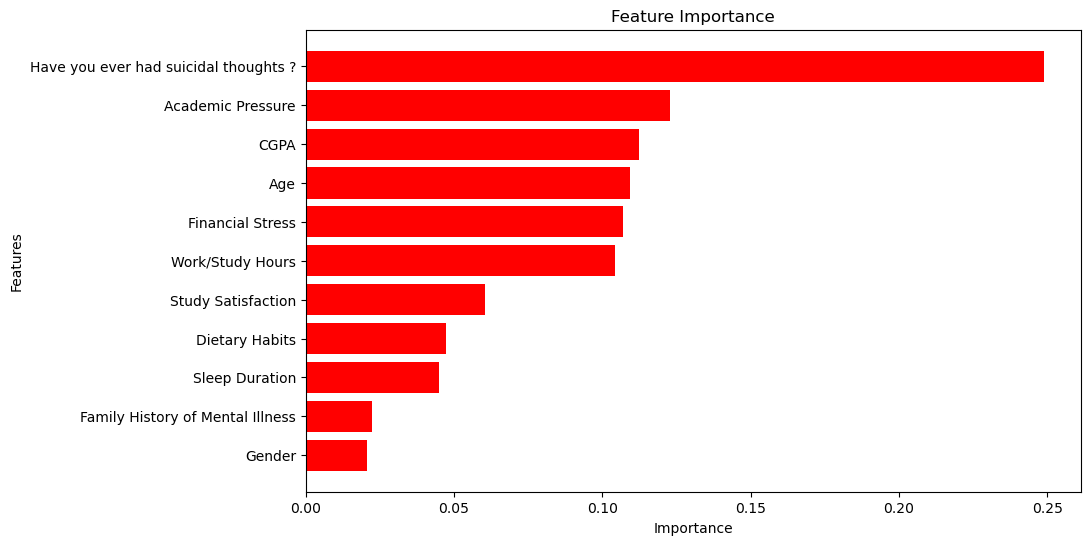

In [213]:
importance = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# Bar Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='red')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Reverse the order for readability
plt.show()

## Hyperparameter tuning



### Randomized Search CV

In [214]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=model,param_distributions=param_dist,n_iter=50,cv=5,verbose=2,
                                   random_state=10)
random_search.fit(X,y)

    

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=223; total time=   0.3s
[CV] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=223; total time=   0.4s
[CV] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=223; total time=   0.7s
[CV] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=223; total time=   0.5s
[CV] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=223; total time=   0.3s
[CV] END bootstrap=True, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=469; total time=   0.7s
[CV] END bootstrap=True, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=469; 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C6F8C6C370>,
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C6F8C6C670>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C6F8803820>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C6F8AAC4F0>},
                   random_state=10, verbose=2)

In [125]:
print(random_search.best_params_)

{'bootstrap': True, 'max_depth': 44, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 444}


In [128]:
## Now again evaluating the model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [129]:
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.91


In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       100
           1       0.91      0.91      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



In [131]:
### Hence , this model can give upto 92 percent accuracy,so we look if there 
# is another model , so that the accurcy increases

In [134]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

models ={
    "SVM":SVC(random_state=10),
    "K-Nearest Neighbours":KNeighborsClassifier(),
    "Gradient Boosting":GradientBoostingClassifier(random_state=10),
    "Neural Network":MLPClassifier(random_state=10)}

for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)

    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred))


Model: SVM
Accuracy: 81.50%
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       100
           1       0.80      0.84      0.82       100

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200


Model: K-Nearest Neighbours
Accuracy: 77.50%
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       100
           1       0.75      0.82      0.78       100

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200


Model: Gradient Boosting
Accuracy: 85.00%
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       100
           1       0.84      0.86      0.85       100

    accuracy                           0.85       200
   macro a

C:\Users\kshit\miniconda3\envs\envy\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [135]:
## Hyperparameter tuning for Neural Network
param_grid = {
    'hidden_layer_sizes': [(50,), (100, 50), (100, 100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 300, 500]
}

mlp = MLPClassifier(random_state=10)

random_search_nn = RandomizedSearchCV(
    estimator=mlp, 
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)

random_search_nn.fit(X_train,y_train)
best_model_nn = random_search_nn.best_estimator_

y_pred = best_model.predict(X_test)

print("Best Parameters:", random_search_nn.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'solver': 'sgd', 'max_iter': 500, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 100, 50), 'alpha': 0.001, 'activation': 'tanh'}
Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       100
           1       0.91      0.91      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



In [136]:
print(accuracy)

0.875


In [140]:
## Now hyperparameter tuning for gradient boosting
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

gb = GradientBoostingClassifier(random_state=10)

random_search_gb = RandomizedSearchCV(
    estimator=gb, 
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available CPU cores
    random_state=10
)
random_search_gb.fit(X_train, y_train)

# Get the best model
best_model = random_search_gb.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)
print("Best Parameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))




Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'bootstrap': True, 'max_depth': 44, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 444}
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       100
           1       0.85      0.87      0.86       100

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



In [141]:
## It seems that the RandomForestClassifier is the bese model for this case .

### Using GridSearchCV

In [143]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [400, 450, 500],
    'max_depth': [30, 40, 50],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

model = RandomForestClassifier(random_state=10)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1)

grid_search.fit(X_train,y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 450}
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       100
           1       0.85      0.88      0.86       100

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



In [144]:
from scipy.stats import randint

# Set a refined distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(300, 600),  # Expand range
    'max_depth': randint(20, 60),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=100,  # More iterations for better exploration
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Get the best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions with the fine-tuned model
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Best Parameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'bootstrap': True, 'class_weight': None, 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 555}
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       100
           1       0.85      0.88      0.86       100

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



In [145]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=model,param_distributions=param_dist,n_iter=50,cv=5,verbose=2,
                                   random_state=10)
random_search.fit(X,y)

    

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=223; total time=   0.5s
[CV] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=223; total time=   0.3s
[CV] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=223; total time=   0.3s
[CV] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=223; total time=   0.3s
[CV] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=223; total time=   0.3s
[CV] END bootstrap=True, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=469; total time=   0.7s
[CV] END bootstrap=True, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=469; 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C6FF005EE0>,
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C6FEB19E20>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C6FF294B80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C6F8B9B280>},
                   random_state=10, verbose=2)

In [146]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [147]:
print(accuracy_score(y_pred,y_test))

0.91


In [148]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 1000),  # Expanded range
    'max_depth': randint(5, 100),  # Expanded range
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']  # For RandomForest
}


random_search = RandomizedSearchCV(estimator=model,param_distributions=param_dist,n_iter=50,cv=5,verbose=2,
                                   random_state=10)
random_search.fit(X,y)

    

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=981; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=981; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=981; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=981; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=18, n_estimators=981; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=78, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=471; total time=   0.0s
[

C:\Users\kshit\miniconda3\envs\envy\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
65 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kshit\miniconda3\envs\envy\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kshit\miniconda3\envs\envy\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\kshit\miniconda3\envs\envy\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C6FF686BE0>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C6FEFC3100>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C6FF289B50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C6FB4EE5B0>},
                   random_state=10, verbose=2)

In [149]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [150]:
print(accuracy_score(y_pred,y_test))

0.9


In [215]:



correlation = filtered_data.corr()

# Display correlation of all features with the target column
correlation_target = abs(correlation['Depression']).sort_values(ascending=False)
print(correlation_target)


Depression                               1.000000
Have you ever had suicidal thoughts ?    0.577886
Academic Pressure                        0.406008
Financial Stress                         0.336510
Age                                      0.265353
Dietary Habits                           0.207300
Work/Study Hours                         0.182032
Study Satisfaction                       0.118141
Family History of Mental Illness         0.071067
CGPA                                     0.053882
Sleep Duration                           0.051050
Gender                                   0.017174
Name: Depression, dtype: float64


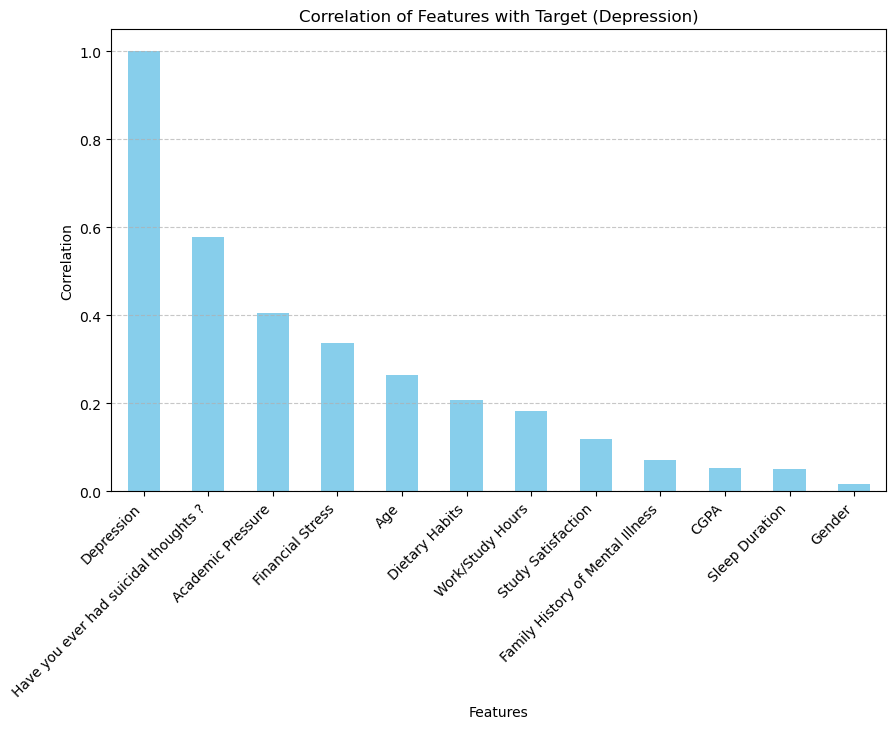

In [216]:
# Plotting the correlation values as a bar plot
plt.figure(figsize=(10, 6))
correlation_target.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Target (Depression)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [217]:
## From this figure , we can see that the Gender column has low correlation to the Depression. SO we can remove thuis from the data

In [218]:
filtered_data.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,31.0,5.0,5.60,1.0,1,1,1,2.0,1.0,1,1
1,0,21.0,5.0,9.41,3.0,4,3,1,8.0,4.0,1,1
2,0,26.0,1.0,5.26,4.0,4,3,1,2.0,5.0,0,1
3,1,28.0,4.0,9.66,3.0,2,3,1,3.0,4.0,1,1
4,1,21.0,4.0,9.21,1.0,1,2,1,11.0,4.0,0,1


In [219]:
filtered_data = filtered_data.drop(columns=['Gender'],axis=1)

In [220]:
filtered_data.head()

,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,31.0,5.0,5.60,1.0,1,1,1,2.0,1.0,1,1
1,21.0,5.0,9.41,3.0,4,3,1,8.0,4.0,1,1
2,26.0,1.0,5.26,4.0,4,3,1,2.0,5.0,0,1
3,28.0,4.0,9.66,3.0,2,3,1,3.0,4.0,1,1
4,21.0,4.0,9.21,1.0,1,2,1,11.0,4.0,0,1


In [221]:
# Now that we have dropped the gender column, we again train the data.

In [222]:
X = filtered_data.drop(columns=["Depression"])
y= filtered_data.Depression

In [228]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2, random_state=10)

In [229]:
print(X_train.shape)

(799, 10)


In [230]:
print(y_train.shape)

(799,)


In [231]:
print(X_test.shape)

(200, 10)


In [232]:
model = RandomForestClassifier(random_state=10)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [233]:
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1])

In [234]:
y_pred.shape

(200,)

In [235]:
y_test.shape

(200,)

In [241]:
import numpy as np

count = np.sum(np.array(y_pred) == np.array(y_test))
print(f'Count of correct predictions: {count}')



Count of correct predictions: 152


In [242]:
accuracy_score(y_pred,y_test)

0.76

In [243]:
## Hyperparameter tuning :

In [244]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=model,param_distributions=param_dist,n_iter=50,cv=5,verbose=2,
                                   random_state=10)
random_search.fit(X,y)

    

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=223; total time=   0.5s
[CV] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=223; total time=   0.8s
[CV] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=223; total time=   0.4s
[CV] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=223; total time=   0.5s
[CV] END bootstrap=False, max_depth=46, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=223; total time=   0.4s
[CV] END bootstrap=True, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=469; total time=   0.9s
[CV] END bootstrap=True, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=7, n_estimators=469; 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C6F8AB8880>,
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C6F8AB8A30>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C6F92AE370>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C6F92AE9D0>},
                   random_state=10, verbose=2)

In [245]:
random_search.best_params_

{'bootstrap': True,
 'max_depth': 44,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'n_estimators': 444}

In [246]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [247]:
accuracy_score(y_pred,y_test)

0.87

In [249]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy found:  0.8523191823899371


In [250]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Initialize Randomized Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, 
                                   scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)


Best parameters found:  {'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 785}
Best accuracy found:  0.8485455974842768


In [251]:
X_test

,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
659,34.0,2.0,7.68,5.0,3,2,0,5.0,1.0,0
222,21.0,3.0,8.04,2.0,2,1,1,9.0,3.0,1
976,19.0,3.0,7.80,4.0,4,2,0,2.0,1.0,0
250,19.0,3.0,9.54,2.0,2,2,0,11.0,5.0,1
834,33.0,2.0,5.58,3.0,1,2,0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
519,22.0,2.0,8.58,4.0,3,3,0,6.0,5.0,0
188,27.0,4.0,6.37,4.0,4,2,1,0.0,3.0,0
194,19.0,5.0,9.12,1.0,4,3,1,2.0,3.0,0
765,19.0,4.0,9.37,2.0,3,1,1,3.0,1.0,1


In [260]:
new_data = np.array([[1,20,1.0,5.0,4,3,1,11.0,1.0,0]])

In [261]:
prediction = model.predict(new_data)

C:\Users\kshit\miniconda3\envs\envy\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [259]:
model

RandomForestClassifier(random_state=10)